In [64]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import feature_extraction
from sklearn import linear_model
import nltk
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
#nltk.download()

In [29]:
ls data

tagged_plots_movielens.csv


In [30]:
df = pd.read_csv('data/tagged_plots_movielens.csv',index_col=0)

In [39]:
df = df.dropna()

In [41]:
df.head()

,movieId,plot,tag
0,1,A little boy named Andy loves to be in his roo...,animation
1,2,When two kids find and play a magical board ga...,fantasy
2,3,Things don't seem to change much in Wabasha Co...,comedy
3,6,Hunters and their prey--Neil and his professio...,action
4,7,An ugly duckling having undergone a remarkable...,romance


In [77]:
df.tag[df.tag=='comedy'].shape[0]/df.shape[0]

0.32138442521631644

In [42]:
df['plot'].apply(lambda x: len(str(x).split(' '))).sum()

171156

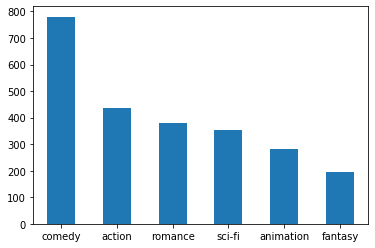

In [43]:
tags = df.tag.unique()

df.tag.value_counts().plot(kind='bar', rot=0)

In [44]:
train_data, test_data = model_selection.train_test_split(df, test_size=0.1, random_state=42)

In [81]:
train_data.tag.value_counts()['comedy']/train_data.shape[0]

0.31776556776556775

In [86]:
train_data.tag.value_counts()/train_data.shape[0]

comedy       0.317766
action       0.180861
romance      0.157967
sci-fi       0.146062
animation    0.115385
fantasy      0.081960
Name: tag, dtype: float64

In [45]:
len(test_data)

243

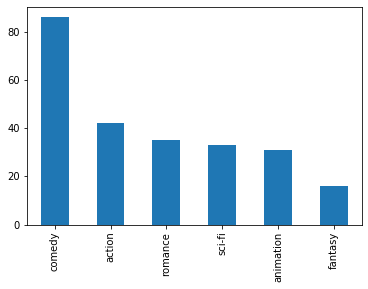

In [46]:
test_data.tag.value_counts().plot(kind='bar')

In [82]:
test_data.tag.value_counts()['comedy']/test_data.shape[0]

0.35390946502057613

In [47]:
# We will use confusion matrices to evaluate all classifiers
count_vectorizer = feature_extraction.text.CountVectorizer(analyzer='word', 
            tokenizer=nltk.word_tokenize, 
            preprocessor=None, stop_words='english',
            max_features=3000)

In [48]:
train_data_features = count_vectorizer.fit_transform(train_data['plot'])

In [49]:
type(train_data_features)

scipy.sparse.csr.csr_matrix

In [51]:
logreg = linear_model.LogisticRegression(n_jobs=1, C=1e5)

In [52]:
logreg = logreg.fit(train_data_features, train_data['tag'])

/home/vashloc/miniconda3/envs/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
logreg.predict()

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
count_vectorizer.get_feature_names()[80:90]

['adventure',
 'adventures',
 'adventurous',
 'advice',
 'affair',
 'affairs',
 'afraid',
 'africa',
 'african',
 'aftermath']

In [61]:
data_features = count_vectorizer.transform(test_data['plot'])
predictions = logreg.predict(data_features)
target = test_data['tag']

In [62]:
accuracy_score(target, predictions)

0.448559670781893

In [67]:
conf_matrix = confusion_matrix(target, predictions)
conf_matrix

array([[24,  1, 12,  0,  3,  2],
       [ 4, 10,  9,  2,  3,  3],
       [12,  7, 48,  3, 15,  1],
       [ 5,  3,  1,  4,  2,  1],
       [ 1,  3, 17,  1, 10,  3],
       [ 8,  5,  5,  2,  0, 13]])

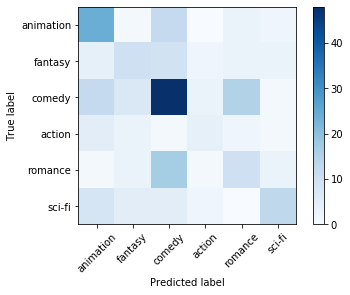

In [74]:
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(tags))
target_names = tags
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [96]:
features = count_vectorizer.get_feature_names()

In [105]:
logreg.classes_

array(['action', 'animation', 'comedy', 'fantasy', 'romance', 'sci-fi'],
      dtype=object)

In [101]:
max_coef = sorted(enumerate(logreg.coef_[0]), key=lambda x: x[1], reverse=True)

In [102]:
max_coef

[(171, 8.150220976020208),
 (491, 7.8718936451398385),
 (1739, 7.694348449226041),
 (560, 7.544907923197892),
 (2497, 7.344100628912899),
 (2679, 7.3149960552072475),
 (2693, 7.217259589111557),
 (2512, 7.082824121586488),
 (2045, 6.843354711491277),
 (2677, 6.783672275333095),
 (2069, 6.7549704617462),
 (2475, 6.707910287256597),
 (2834, 6.613480514620133),
 (2828, 6.60534537521556),
 (822, 6.573076051599692),
 (669, 6.489520188485368),
 (908, 6.3351264388406205),
 (128, 6.306258268349128),
 (1741, 6.301190785779877),
 (191, 6.263493072683747),
 (1911, 6.192578078018435),
 (1088, 6.13649787079657),
 (1163, 5.981239193053548),
 (637, 5.954807709473029),
 (1789, 5.9258227910471435),
 (332, 5.863329729806289),
 (869, 5.791364658274553),
 (2107, 5.791363776737431),
 (44, 5.751337113161898),
 (579, 5.702302209147216),
 (2094, 5.679879662343538),
 (776, 5.567839192248588),
 (1940, 5.560609506289813),
 (1494, 5.50249945662513),
 (2247, 5.49254717782095),
 (1621, 5.448580298713376),
 (1, 5.42

In [104]:
[features[x[0]] for x in max_coef[:10]]

['army',
 'cia',
 'michael',
 'computer',
 'spencer',
 'terrorists',
 'thing',
 'spy',
 'powerful',
 'terror']

In [110]:
for idx,genre in enumerate(logreg.classes_):
    max_coef = sorted(enumerate(logreg.coef_[idx]), key=lambda x: x[1], reverse=True)
    print(f'{genre}: {[features[x[0]] for x in max_coef[:10]]}')
    print()

action: ['army', 'cia', 'michael', 'computer', 'spencer', 'terrorists', 'thing', 'spy', 'powerful', 'terror']

animation: ['animated', 'forest', 'tale', 'animals', 'anna', 'adventurous', 'snow', 'halloween', 'victor', 'prince']

comedy: ['comedy', 'mistaken', 'team', 'duo', 'dealer', 'beloved', 'successful', 'jewish', 'college', 'jail']

fantasy: ['national', 'princess', 'alex', 'adventures', 'kingdom', 'dragon', 'journey', 'white', 'land', 'harry']

romance: ['apartment', 'eve', 'troubled', 'affair', 'decide', 'romantic', 'nazi', 'romance', 'professor', 'relationships']

sci-fi: ['future', 'futuristic', 'deep', 'star', 'technology', 'humans', 'space', 'human', 'alien', 'andrew']

